In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
data = pd.read_csv('HLTV_CSGO_results.csv', sep=';')
data.head()

,Unnamed: 0,match_url,match_id,team_A,team_B,score_tA,score_tB,competition,type_of_match
0,0,https://www.hltv.org/matches/2347942/havu-vs-b...,2347942,HAVU,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3
1,1,https://www.hltv.org/matches/2347941/complexit...,2347941,Complexity,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3
2,2,https://www.hltv.org/matches/2347940/dignitas-...,2347940,Dignitas,HAVU,1,2,FunSpark ULTI 2020 Europe Final,bo3
3,3,https://www.hltv.org/matches/2348267/caronte-v...,2348267,Caronte,PACT,19,17,Flashpoint 3 Open Qualifier 4,trn
4,4,https://www.hltv.org/matches/2348266/alternate...,2348266,ALTERNATE aTTaX,GamerLegion,14,16,Flashpoint 3 Open Qualifier 4,nuke


In [16]:
data = data.drop(axis=1, columns='Unnamed: 0')
data.head()

,match_url,match_id,team_A,team_B,score_tA,score_tB,competition,type_of_match
0,https://www.hltv.org/matches/2347942/havu-vs-b...,2347942,HAVU,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3
1,https://www.hltv.org/matches/2347941/complexit...,2347941,Complexity,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3
2,https://www.hltv.org/matches/2347940/dignitas-...,2347940,Dignitas,HAVU,1,2,FunSpark ULTI 2020 Europe Final,bo3
3,https://www.hltv.org/matches/2348267/caronte-v...,2348267,Caronte,PACT,19,17,Flashpoint 3 Open Qualifier 4,trn
4,https://www.hltv.org/matches/2348266/alternate...,2348266,ALTERNATE aTTaX,GamerLegion,14,16,Flashpoint 3 Open Qualifier 4,nuke


In [25]:
data.isnull().sum()

match_url        0
match_id         0
team_A           0
team_B           0
score_tA         0
score_tB         0
competition      0
type_of_match    0
dtype: int64

In [17]:
print(f'As dimensoes dos dados são: {data.shape}')
print(f'As colunas são {data.columns.values}')

As dimensoes dos dados são: (59539, 8)
As colunas são ['match_url' 'match_id' 'team_A' 'team_B' 'score_tA' 'score_tB'
 'competition' 'type_of_match']


In [30]:
print(f'Os times nesse dataset são: {data.team_A.unique().tolist()}')
print(f'Os campeonatos disponiveis nesse dataset são: {data.competition.unique().tolist()}')

Os times nesse dataset são: ['HAVU', 'Complexity', 'Dignitas', 'Caronte', 'ALTERNATE aTTaX', 'DenDD', 'MAD Lions', 'Chetz', 'SKADE', 'BLINK', 'Ambush', 'SAW', 'UMX', 'TYLOO', 'Young Ninjas', 'Invictus', 'Bears', 'Sharks', 'DETONA', 'Paquetá', 'Santos', 'Bravos', '777', 'Havan Liberty', 'MIBR', 'Cowana', 'Apeks', 'ENCE', 'ex-Winstrike', 'Izako Boars', 'GameAgents', 'Lyngby Vikings', 'NAVI Junior', 'ViCi', 'AGF', 'Isurus', 'los kogutos', 'Anonymo', 'CG', 'DBL PONEY', '1WIN', 'BIG', 'Virtus.pro', 'Trident', 'Fiend', 'Sprout', 'ORDER', 'LDLC', 'forZe', 'Dire Wolves', 'Renewal', 'Movistar Riders', 'Illuminar', 'mCon', 'Nemiga', 'PACT', 'K23', 'OFFSET', 'Galaxy Racer', 'Extra Salt', 'eSuba', 'Exsto', 'Endpoint', 'R!OT', 'M1 EDEN', 'Entropiq', 'Lilmix', 'D13', 'GAIJIN', 'Evil Geniuses', 'Chiefs', 'EC Kyiv', 'EC Brugge', 'Levitate', 'CLEANTmix', '100PG', 'FTW', 'Sangal', 'Simplicity', 'Nordavind', 'TPT', 'BBBMBCBS', 'Triumph', 'Veloz', 'Heroic', 'Familia', 'ATK', 'Brandbergen Shooters', 'G2', 

In [32]:
data.dtypes

match_url        object
match_id          int64
team_A           object
team_B           object
score_tA          int64
score_tB          int64
competition      object
type_of_match    object
dtype: object

In [63]:
campeonatos = data.groupby('competition').match_id.count().reset_index()
campeonatos = campeonatos.sort_values(by=['match_id'], ascending=False).reset_index()

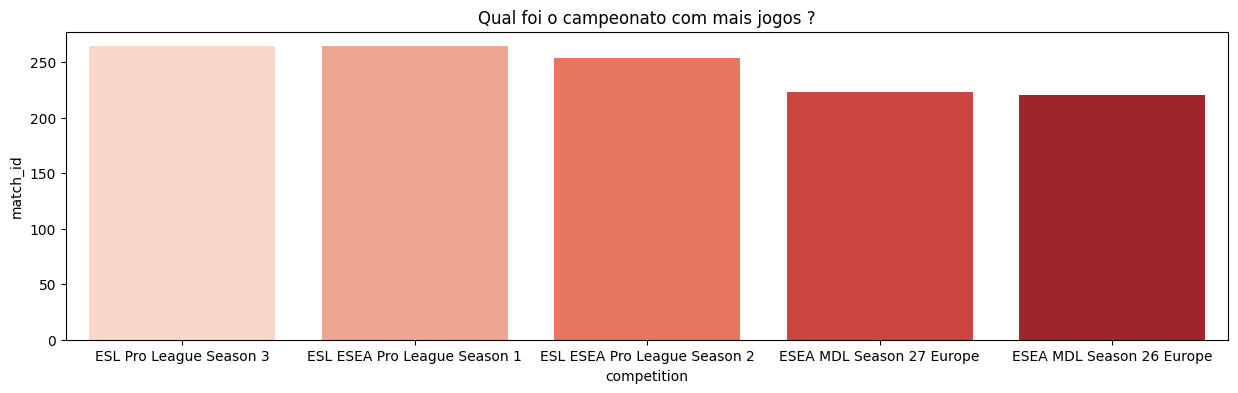

In [65]:
plt.figure(figsize=(15,4))
sns.barplot(x='competition', y='match_id', data=campeonatos[:5], palette='Reds')
plt.title('Qual foi o campeonato com mais jogos ?')
plt.show()

In [89]:
maps = data.groupby('type_of_match').match_id.count().reset_index()
maps = maps.sort_values(by=['type_of_match'], ascending=False).reset_index()
linhas = ['bo2', 'bo3', 'bo5', '-']
for i in linhas:
    linhas_ao_dropar = maps.index[maps.eq(i).any(axis=1)]
    maps = maps.drop(linhas_ao_dropar)
maps.head(20)


,index,type_of_match,match_id
0,14,vtg,246
1,13,trn,3277
2,12,tcn,6
3,11,ssn,110
4,10,ovp,2577
5,9,nuke,2510
6,8,mrg,5688
7,7,inf,5232
8,6,d2,3166
9,5,cch,2962


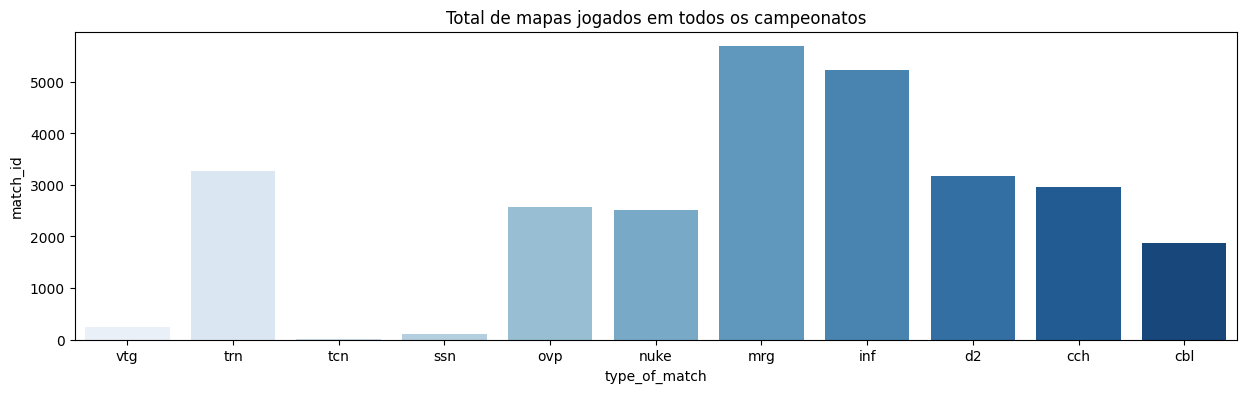

In [93]:
plt.figure(figsize=(15,4))
sns.barplot(x='type_of_match', y='match_id', data=maps, palette='Blues')
plt.title('Total de mapas jogados em todos os campeonatos')
plt.show()